In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sp


In [9]:
def createSignal(freqList, lenSignal, timePeriod, burstFreq, burstTime):
    
    t = np.linspace(timePeriod[0], timePeriod[1], lenSignal)
    
    signal =  np.sin(np.pi * 2. * burstFreq * t) 
    
    signal[np.logical_or(t < burstTime[0], t > burstTime[1])] = 0 # switch off signal for times out of the bursttime
    
    on_time = np.logical_and(t >= burstTime[0], t <= burstTime[1]) #time when the signal should be on
    
    signal[on_time] *= np.hanning(on_time.sum()) 
    
    hanning_signal = signal
    
    plt.plot(hanning_signal, 'g')
    
    plt.title('Hanning Windowed Signal')
    for f in freqList:
        signal += np.sin(2*np.pi*f*t)
        
    return signal


def getFT(signal):
    ft = np.fft.fft(signal)/len(signal)
    return np.abs(ft[:len(signal)//2])

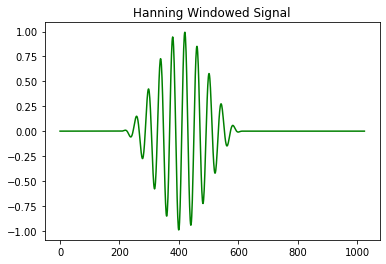

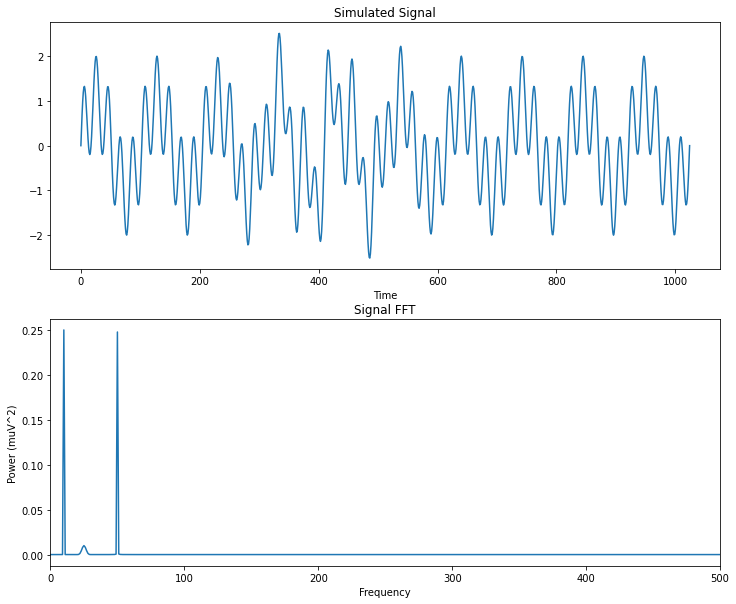

In [11]:
%matplotlib inline
freqList = [10, 50]
N = 1025
timePeriod = [0,1]
burstFreq = 25
burstTime = [0.2, 0.6]

signal= createSignal(freqList, N, timePeriod, burstFreq,burstTime)

signal_ft = (getFT(signal))**2

fig, axes = plt.subplots(2, 1, figsize=(12,10))
axes[0].plot(signal)
axes[0].set(xlabel='Time', title='Simulated Signal')
axes[1].plot(signal_ft)
axes[1].set(xlabel='Frequency', xlim=(0,500), ylabel='Power (muV^2)', title='Signal FFT');


<ipython-input-12-30ed8b9f99f7>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c = plt.pcolor(t, f, np.abs(Z))


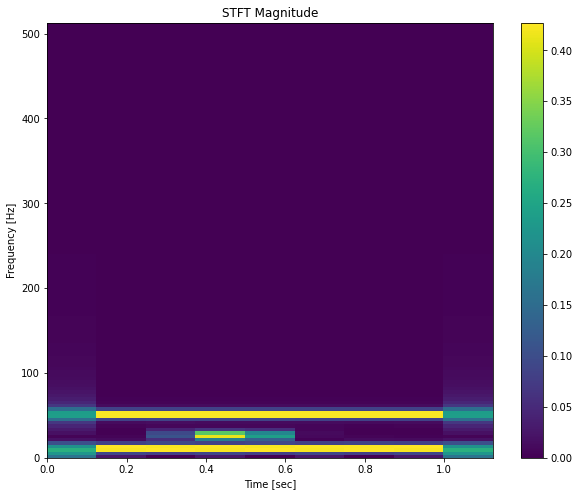

In [12]:
f, t, Z = sp.stft(signal, len(signal))
plt.figure(figsize=(10,8))
c = plt.pcolor(t, f, np.abs(Z))

plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar(c)
plt.show()